<a href="https://colab.research.google.com/github/Jeongmin-heo/tobigs_assignment/blob/master/week8_NLP_heojeongmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Collection

- 자기소개서를 쓰다보면 어떤 내용을 써야할지 자주 막막하였습니다. 이러한 고민으로부터 시작하여 기업의 합격자소서 속에서 핵심 키워드를 얻을 수 있다면 키워드를 기반으로 살을 붙히는 것은 자신있기 때문에 자기소개서를 쓸 때 도움이 될 것이라고 생각하였습니다. 

- 이번과제에서는 SK하이닉스의 "합격" 자기소개서 약 200개를 크롤링하고 이러한 자료를 가지고 분석을 진행해보도록 하겠습니다. 

- 특정 직무에 대해서 합격자소서에 자주 나오는 키워드를 작성하는 것이 도움이 될 것이라고 가정하고 분석을 진행하겠습니다. 

- 사람인 홈페이지에서 제공하는 자기소개서 데이터를 활용하기 위하여 합격 자소서 내용을 크롤링 하였습니다. 

- 자기소개서의 내용을 직무별/질문별로 크롤링하여 데이터를 확인해보도록 하겠습니다.

- colab에서 셀레니움을 진행하는 법을 찾지못하여 jupyter로 진행하였습니다. 

In [0]:
#셀레니움을 사용하기 위한 정보를 다운로드 받습니다. 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.wait import WebDriverWait as Wait
import pandas as pd
import numpy as np
import re
import time 
from time import sleep

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

import string
import random

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [0]:
driver = webdriver.Chrome("./chromedriver.exe") #웹드라이브 실행
driver.get("http://www.saramin.co.kr/zf_user/public-recruit/coverletter-list?pass_status=y&apply_dept=&coverletter_item=&company_nm=SK%ED%95%98%EC%9D%B4%EB%8B%89%EC%8A%A4#listTop") #주소 get
answer=[]
#인재상을 알아보자

In [0]:
#빠른 크롤링 진행을 위하여 try를 과도하게 사용하였습니다.....
for i in range(0,7):
    try:
        sleep(1)
        driver.find_element_by_xpath('//*[@id="listArea"]/div/a['+str(i)+']').click()

        try:
            for j in range(1,21):
                try:
                    sleep(1)
                    target=driver.find_element_by_xpath('//*[@id="listArea"]/table/tbody/tr['+str(j)+']/td[2]/h2/a') #게시물 입장
                    target.send_keys(Keys.CONTROL + "\n") # window 새로운 탭 열기
                    driver.switch_to_window(driver.window_handles[1]) #새탭으로 이동
                    try:
                        sleep(1)
                        # 1번 내용 긁기
                        k = driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[2]').text
                        text = k[:k.index("글자수")]
                        answer.append(text)
                        
                        #2번 내용 긁기
                        driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[3]/button').click() #2번질문
                        k = driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[4]').text
                        text = k[:k.index("글자수")]
                        answer.append(text)
                        
                        #3번
                        driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[5]/button').click() #3번질문
                        k = driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[6]').text
                        text = k[:k.index("글자수")]
                        answer.append(text)
                                   
                        #4번
                        driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[7]/button').click() #4번질문 
                        k = driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[2]/div[2]/div[8]').text
                        text = k[:k.index("글자수")]
                        answer.append(text)

                        
                    except:
                        pass
                    
                    driver.close()
                    driver.switch_to_window(driver.window_handles[0]) #원래탭으로 이동

                except:
                    pass
        except:
            pass
    except:
        pass

In [0]:
#csv로 저장
answer_df = pd.DataFrame(answer)
answer_df.to_csv("합격자소서.csv", index=False, encoding="utf-8-sig")

# 2.Tokenizing

## 2.1 데이터 전처리
- 빠른 크롤링을 위하여 자기소개서의 모든 내용을 긁다보니 부득이하게 질문과, 불필요한 내용들이 같이 긁혀왔습니다. 

- 이를 처리하는 작업을 먼저 진행하도록 하겠습니다.

- 현재 데이터프레임 1행에는 한명의 모든 자기소개서 내용이 들어있기 때문에 이를 문장단위로 잘라내도록 하겠습니다. 

- 문장을 나누는 기준은 마침표로하고 추가적으로 특수문자역시 처리하도록 하겠습니다.(강의자료를 활용하였습니다.)

- 여기부터는 colab으로 진행하겠습니다.

In [4]:
cd /content/drive/My Drive/colab_workspace

/content/drive/My Drive/colab_workspace


In [7]:
ls

 build/          'diretory to extrat'/   __MACOSX/   train/   week9.zip
 합격자소서.csv   khaiii/                test/       week9/


In [8]:
import numpy as np
import pandas as pd
!pip install KoNLPy
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext
twitter = Okt()  #twitter class 객체당!
komoran = Komoran()
kkma = Kkma()
data = pd.read_csv('합격자소서.csv')

     |████████████████████████████████| 19.4MB 158kB/s 
     |████████████████████████████████| 2.4MB 50.9MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [9]:
data_list = data['0'].tolist()
data_list[0:5]
# 모든 경우를 살펴본 결과 앞에서 질문, 답변순서로 나타나는 것을 알수있었습니다. 따라서 질문을 삭제하고 \n 와 .단위로 잘라 문장단위로 리스트를 재구성하도록 하겠습니다.

['1. 자발적 V(Voluntarily)으로 최고 수준의 목표를 세우고 끈질기게 성취한 경험에 대해 서술해 주십시오\n[함께하는 학생회]\n2016년도 학생회장을 하며 외친 구호는 ‘어깨동무’였습니다. 여러 명이 함께하는 어깨동무가 ‘학우들과 함께하는 학생회를 만들자는 목표’를 잘 나타낸다고 생각했기 때문입니다. 높은 남학우의 비율, 1000명이 넘는 인원으로 인한 저조한 참석률을 획기적으로 높이긴 어렵다고 생각했지만, 과의 발전을 위해 학생회 구성원들과 함께 목표를 이루기 위해 노력했습니다.\n\n[참여를 위한 3가지 아이디어]\n기계공학과 학술제에서 학우들의 참여율을 높이기 위해, 주 1회이었던 회의를 2회로 늘리고 많은 생각들을 공유하며 3가지 아이디어를 실천했습니다.\n1. 학술제 홍보를 위해 따라 부르기 쉬운 홍보 곡을 만들어 부르기 및 홍보 포스터 부착\n2. 학술제에 관한 익명 투표 및 자유게시판을 통한 학우들과 소통\n3. 학우들의 요구에 맞게 학술제를 보완하기\n\n[성공적인 소통, 부족했던 예산]\n위의 3가지 아이디어로 학우들의 의견을 수렴할 수 있었고, 그 중에 제일 많았던 의견 두 가지는 대학원에 대한 정보를 알고 싶다는 것과 다양한 회사의 인적성 모의고사 실행이었습니다. 대학원 정보에 대한 요구는 모든 연구실과 교수실을 방문하고 학우들의 요구를 어필해서 기계공학과 전 연구실에 대한 설명회를 개최할 수 있었지만, 기존 2가지 종류였던 인적성 모의고사를 4가지로 늘리는 과정에서 예산이 부족하다는 문제가 발생했습니다. 문제를 해결하기 위해 동일한 조건에서 최저 비용이드는 업체들을 조사하고, 기획안과 지원금 요청서를 제출하며 학과사무실과 학과장님으로부터 지원금을 받아 예산의 2배가 넘는 비용을 해결할 수 있었습니다.\n\n[130%의 참여율]\n학우들과 함께하는 학생회라는 목표를 달성하기 위해 학생회 구성원들과 노력하고, 예상하지 못했던 예산 문제를 해결하면서 개선된 학술제를 기획했습니다. 그 결과 예년에 비해 참여율이 30%이상 증가된 학

In [0]:
kk_k=[]
word_text=[]
for j in range(len(data_list)):
  kk=data_list[j].split('\n')
  kk=kk[1:]
  for i in range(len(kk)):
    word_text=kk[i].split('.')
    kk_k.append([[i] for i in word_text if len(i) >= 1])

In [11]:
from itertools import chain
text_corpus=[[i] for i in list(chain(*list((chain(*kk_k)))))]
text_corpus[1] #한문장 단위로 리스트가 완성된 것을 확인할 수 있습니다

['2016년도 학생회장을 하며 외친 구호는 ‘어깨동무’였습니다']

# 2. Tokenizing

## 2.2 Khaiii 

- Khaiii는 "Kakao Hangul Analyzer III"의 첫 글자들만 모아 만든 이름으로 카카오에서 개발한 세 번째 형태소분석기입니다. 두 번째 버전의 형태소분석기 이름인 dha2 (Daumkakao Hangul Analyzer 2)를 계승한 이름이기도 합니다.

- 이를 활용하여 형태소를 기준으로 나누어 보도록 하겠습니다. 

- 형태소는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위로 발화체 내에서 따로 떼어낼 수 있는 것을 말합니다. 즉, 더 분석하면 뜻이 없어지는 말의 단위입니다. 

- 형태소분석기는 단어를 보고 형태소 단위로 분리해내는 소프트웨어를 말합니다. 이러한 형태소분석은 자연어 처리의 가장 기초적인 절차로 이후 구문 분석이나 의미 분석으로 나아가기 위해 가장 먼저 이루어져야 하는 과정으로 볼 수 있습니다. (한국어 위키피디아에서 인용)

In [12]:
cd /content

/content


In [13]:
!git clone https://github.com/kakao/khaiii.git #여기서부터는 Khaiii 설치 과정입니다. 

Cloning into 'khaiii'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 957 (delta 25), reused 49 (delta 19), pack-reused 877
Receiving objects: 100% (957/957), 33.03 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (383/383), done.


In [14]:
!pip install cmake

In [0]:
!mkdir build

In [16]:
!cd build && cmake /content/khaiii #이부분에서 굉~~~장히 오래걸리는 것을 알 수 있습니다. 

-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test fma_compiles
-- Performing Test fma_compiles - Success
-- Performing Test fma_runs
-- Performing Test fma_runs - Success
-- [khaiii] fused multiply add option enab

In [17]:
!cd /content/build/ && make all #이부분도....

Scanning dependencies of target obj_khaiii
[  3%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Config.cpp.o
[  7%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Embed.cpp.o
[ 11%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/ErrPatch.cpp.o
[ 15%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/KhaiiiImpl.cpp.o
[ 19%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Morph.cpp.o
[ 23%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Preanal.cpp.o
[ 26%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Resource.cpp.o
[ 30%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Restore.cpp.o
[ 34%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Sentence.cpp.o
[ 38%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Tagger.cpp.o
[ 42%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Trie.cpp.o
[ 4

In [18]:
!cd /content/build/ && make resource

Scanning dependencies of target resource
INFO:root:config: {
    "cutoff": 1,
    "embed_dim": 35,
    "hidden_dim": 320,
    "model_id": "munjong.cut1.win4.sdo0.1.emb35.lr0.001.lrd0.9.bs500",
    "rsc_src": "../rsc/src",
    "window": 4
}
INFO:root:vocab.in: 5621 entries, 0 cutoff
INFO:root:vocab.out: 500 entries, 0 cutoff
INFO:root:restore.dic: 4303 entries
INFO:root:preanal.auto
INFO:root:preanal.manual
INFO:root:trie saved: /content/build/share/khaiii/preanal.tri
INFO:root:total nodes: 120812
INFO:root:expected size: 1932992
INFO:root:value saved: /content/build/share/khaiii/preanal.val
INFO:root:total entries: 83373
INFO:root:expected size: 593730
INFO:root:restore.key: 17212
INFO:root:restore.val: 68848
INFO:root:restore.one: 503
INFO:root:base.errpatch.manual
INFO:root:base.errpatch.auto
INFO:root:trie saved: /content/build/share/khaiii/errpatch.tri
INFO:root:total nodes: 2067
INFO:root:expected size: 33072
INFO:root:length saved: /content/build/share/khaiii/errpatch.len
INFO:ro

In [19]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Installing: /usr/local/include/khaiii
-- Installing: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Installing: /usr/local/include/khaiii/khaiii_dev.h
-- Installing: /usr/local/include/khaiii/khaiii_api.h
-- Installing: /usr/local/share/khaiii
-- Installing: /usr/local/share/khaiii/config.json
-- Installing: /usr/local/share/khaiii/conv.3.fil
-- Installing: /usr/local/share/khaiii/restore.one
-- Installing: /usr/local/share/khaiii/embed.bin
-- Installing: /usr/local/share/khaiii/conv.4.fil
-- Installing: /usr/local/share/khaiii/conv.5.fil
-- Installing: /usr/local/share/khaiii/errpatch.tri
-- Installing: /usr/local/share/khaiii/hdn2tag.lin
-- Installing: /usr/local/share/khaiii/preanal.tri
-- Installing: /usr/local/share/khaiii/preanal.val
-- Installing: /usr/local/share/khaiii/errpatch.val
-- Installing: /usr/local/

In [20]:
!cd /content/build && make package_python

Scanning dependencies of target package_python
Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [21]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp36-none-any.whl size=22883043 sha256=69e6e1281d29fd82987e1a767424bd75932a0e9d1407499bae11eb5c3dd923f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-406iyw78/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii


In [22]:
from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze("안녕, 세상."):
    print(word)
#test 결과 잘 작동하는 것을 알 수 있습니다. 

안녕,	안녕/IC + ,/SP
세상.	세상/NNG + ./SF


- Khaiii를 활용하여 제가 가지고 있는 문장 데이터를 토큰화하는 작업을 진행하였습니다. 
- 반복문을 통하여 이중 리스트에서 리스트 한개씩 꺼내서 작업을 진행하였습니다. 결과적으로 토큰화된 한문장으로 변환할 수 있었습니다.  

In [0]:
text_sentence=[]

for i in range(len(text_corpus)):
  morphs = []
  for word in api.analyze(text_corpus[i][0]):
    for morph in word.morphs:
      morphs.append((morph.lex,morph.tag))
  text_sentence.append(morphs)

In [24]:
text_sentence[3] #문장단위로 잘 분류하는 것을 알수 있습니다. 

[('높', 'VA'),
 ('은', 'ETM'),
 ('남학', 'NNG'),
 ('우', 'NNP'),
 ('의', 'JKG'),
 ('비율', 'NNG'),
 (',', 'SP'),
 ('1000', 'SN'),
 ('명', 'NNB'),
 ('이', 'JKS'),
 ('넘', 'VV'),
 ('는', 'ETM'),
 ('인원', 'NNG'),
 ('으로', 'JKB'),
 ('인하', 'VV'),
 ('ㄴ', 'ETM'),
 ('저조', 'NNG'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('참석', 'NNG'),
 ('률', 'XSN'),
 ('을', 'JKO'),
 ('획기적', 'NNG'),
 ('으로', 'JKB'),
 ('높이', 'VV'),
 ('기', 'ETN'),
 ('ㄴ', 'JX'),
 ('어렵', 'VA'),
 ('다고', 'EC'),
 ('생각', 'NNG'),
 ('하', 'XSV'),
 ('였', 'EP'),
 ('지만', 'EC'),
 (',', 'SP'),
 ('과', 'NNG'),
 ('의', 'JKG'),
 ('발전', 'NNG'),
 ('을', 'JKO'),
 ('위하', 'VV'),
 ('여', 'EC'),
 ('학생회', 'NNG'),
 ('구성원', 'NNG'),
 ('들', 'XSN'),
 ('과', 'JKB'),
 ('함께', 'MAG'),
 ('목표', 'NNG'),
 ('를', 'JKO'),
 ('이루', 'VV'),
 ('기', 'ETN'),
 ('위하', 'VV'),
 ('여', 'EC'),
 ('노력', 'NNG'),
 ('하', 'XSV'),
 ('였', 'EP'),
 ('습니다', 'EC')]

위에서 언급한 것 처럼 합격 자소서의 키워드를 추출하는 것이기 때문에 명사 품사만 따로 추출하여 진행해보도록하겠습니다. 

In [0]:
text_sentence=[]

for i in range(len(text_corpus)):
  morphs = []
  for word in api.analyze(text_corpus[i][0]):
    for morph in word.morphs:
      #체언	NNG	일반 명사	의존 형태	EP	선어말 어미
      #체언	NNP	고유 명사	의존 형태	EF	종결 어미
      #체언	NNB	의존 명사	의존 형태	EC	연결 어미
      if morph.tag=="NNG" or morph.tag=="NNP" or morph.tag=="NNB":
        morphs.append((morph.lex)) #morph.tag
  text_sentence.append(morphs)

In [26]:
text_sentence[3] #명사에 대해서만 잘 처리되는 것을 확인할 수 있었습니다. 

['남학',
 '우',
 '비율',
 '명',
 '인원',
 '저조',
 '참석',
 '획기적',
 '생각',
 '과',
 '발전',
 '학생회',
 '구성원',
 '목표',
 '노력']

In [0]:
text_sentence_df = pd.DataFrame(text_sentence)
text_sentence_df.to_csv("text_sentence.csv", index=False, encoding="utf-8-sig") #혹시모르니깐 저장...
text_sentence_df = pd.read_csv('text_sentence.csv')

In [0]:
text_sentence_1=[]

for i in range(len(text_corpus)):
  morphs_1 = []
  for word in api.analyze(text_corpus[i][0]):
    for morph in word.morphs:
      #체언	NNG	일반 명사	의존 형태	EP	선어말 어미
      #체언	NNP	고유 명사	의존 형태	EF	종결 어미
      #체언	NNB	의존 명사	의존 형태	EC	연결 어미
      #용언	VV	동사	의존 형태	XPN	체언 접두사
      #용언	VA	형용사	의존 형태	XSN	명사 파생 접미사
      if morph.tag=="NNG" or morph.tag=="NNP" or morph.tag=="NNB" or morph.tag=="VV" or morph.tag=="VA":
        morphs_1.append((morph.lex)) #morph.tag
  text_sentence_1.append(morphs_1)

In [42]:
text_sentence_1[3] #명사 동사, 형용사에 대해 모두 잘나오는 것을 알 수 있습니다.

['높',
 '남학',
 '우',
 '비율',
 '명',
 '넘',
 '인원',
 '인하',
 '저조',
 '참석',
 '획기적',
 '높이',
 '어렵',
 '생각',
 '과',
 '발전',
 '위하',
 '학생회',
 '구성원',
 '목표',
 '이루',
 '위하',
 '노력']

#3. Embedding
## 3.1 word2vec

이제 word2vec을 진행해보도록 하겠습니다. 
적용시킬 모델 코드 의미는 다음과 같습니다. 
- 포스태깅된 컨텐츠를 100차원의 벡터로 바꾼다.
- 주변 단어(window)는 앞뒤로 세개까지 보되, 코퍼스 내 출현 빈도가 3번 미만인 단어는 분석에서 제외. 
- CPU는 쿼드코어를 쓰고 100번 반복 학습.
- 분석방법론은 CBOW와 Skip-Gram 선택.
(sg ->0 이면 CBOW, 1이면 skip-gram)

## 3.1.1 Skip Gram Model

In [0]:
# Word2Vec embedding_skipgram_model
from gensim.models import Word2Vec
embedding_skipgram_model = Word2Vec(text_sentence, size=100, window = 3, min_count=3, workers=4, iter=100, sg=1)

In [0]:
embedding_skipgram_model_1 = Word2Vec(text_sentence_1, size=100, window = 3, min_count=3, workers=4, iter=100, sg=1)

## 3.1.2 CBOW Model

In [0]:
# Word2Vec embedding
embedding_cbow_model = Word2Vec(text_sentence, size=100, window = 3, min_count=3, workers=4, iter=100, sg=0)

In [0]:
embedding_cbow_model_1 = Word2Vec(text_sentence_1, size=100, window = 3, min_count=3, workers=4, iter=100, sg=0)

#4. Insight 도출
## 4.1 Similarity


## CBOW

In [30]:
print(embedding_cbow_model.most_similar(positive=["분석"], topn=5))

[('보완', 0.5800953507423401), ('근본', 0.5414000749588013), ('주행', 0.5402554869651794), ('최적화', 0.5400269031524658), ('알고리즘', 0.5282504558563232)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


- 먼저 CBOW 모델에 대하여 코사인 유사도를 확인했을때는 위와 같은 단어들이 도출되었습니다.
- Skip Gram 과 다르게 '보완','최적화','원인','주행' 등의 결과가 도출되는 것을 확인할 수 있었습니다. 

In [43]:
print(embedding_cbow_model_1.most_similar(positive=["분석"], topn=5))

[('시각', 0.6297801733016968), ('원인', 0.5020066499710083), ('그래프', 0.47252026200294495), ('근본', 0.4674636721611023), ('노이즈', 0.45919930934906006)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Skip Gram
- 이번에는 Skip-Gram 모델에 대해서 코사인 유사도를 확인했을때 위와 같은 결과가 출력되었습니다. 
- 개인적으로 '원인', '한계점', '노이즈', '샘플'과 같이 분석과 관련있는 단어들이 잘 추출된 것 같습니다.

In [31]:
print(embedding_skipgram_model.most_similar(positive=["분석"], topn=5))

[('원인', 0.5395907163619995), ('한계점', 0.48425859212875366), ('노이즈', 0.4822809100151062), ('협약', 0.48156487941741943), ('근본', 0.4813821017742157)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(embedding_skipgram_model_1.most_similar(positive=["분석"], topn=5))

In [32]:
print(embedding_skipgram_model.most_similar(positive=["원인"], topn=5))

[('근본', 0.6041475534439087), ('공정상', 0.6011518239974976), ('느낌', 0.5771118402481079), ('불화', 0.5656636357307434), ('분석', 0.5395906567573547)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [40]:
print(embedding_skipgram_model_1.most_similar(positive=["원인"], topn=5))

[('근본', 0.5703336596488953), ('시각', 0.5481021404266357), ('공정상', 0.5238850116729736), ('오류', 0.4924897849559784), ('충돌', 0.48913443088531494)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


- 분석에서 가장 가까운 "원인"이라는 단어를가지고 다시 유사도를 확인해 봤을때 근본, 공정상, 느낌 등  상태와 관련된 단어가 출력되는 것을 알 수 있었습니다. 

### 이를 통해 가상으로 자소서를 적고자 할때 그 방향을 요약해보면

 Q. 프로젝트를 성공적으로 진행한 경험을 작성해주세요

 A. 분석프로젝트를 진행 -> 분석자체의 과정 설명(분석 주제를 선택한 원인(이유), 샘플, 노이즈, 신호 등 분석과 관련된 설명) -> 원인과 연결시켜서 결론을 작성(근본적인 문제해결, 공정문제 해결, 어떤 느낌을 받았는지 ) 하는 방식으로 작성할 수 있을 것입니다. 


In [33]:
print(embedding_skipgram_model.most_similar(positive=["마케팅"], topn=20))

[('전략', 0.6459161043167114), ('캠페인', 0.6150782108306885), ('집중', 0.553503155708313), ('인적', 0.5470288991928101), ('젠테이션', 0.5388791561126709), ('모듈의', 0.5374928712844849), ('홍보', 0.5372350215911865), ('프레', 0.5347737073898315), ('자발', 0.5327283143997192), ('창업', 0.5324201583862305), ('기체', 0.5300257205963135), ('학술제', 0.521848201751709), ('포터즈', 0.5200812220573425), ('진척', 0.5138633251190186), ('토론', 0.5125038027763367), ('절약', 0.5090566873550415), ('경과', 0.5057213306427002), ('모교', 0.49950265884399414), ('아시안', 0.4968807101249695), ('문자', 0.49466273188591003)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


- 직무와 관련하여 '마케팅'을 넣어봤을때 위와같은 결과가 도출되었습니다. 

- ('전략', 0.7013311386108398)
- ('캠페인', 0.6227498054504395)
- ('집중', 0.5796229839324951)
- ('포터즈', 0.564922034740448)
- ('모듈의', 0.5460696220397949)
- ('자발', 0.5369883179664612)
- ('고등학생', 0.5321604013442993)
- ('프레', 0.5166022777557373) #아래의 젠테이션과 분리되었음
- ('나머지', 0.5155303478240967)
- ('매장', 0.5152865648269653)
- ('서', 0.5143176913261414)
- ('젠테이션', 0.5127866268157959) #위에 프레와 분리되어 출력-> 오히려 프레젠테이션이 잘뽑힌다는 것을 반증?
- ('홍보', 0.5095006227493286)
- ('인적', 0.5050219297409058)
- ('문자', 0.5026392936706543)
- ('창업', 0.5009638071060181)
- ('절약', 0.49959731101989746)
- ('학술제', 0.4965096116065979)
- ('숙제', 0.4891660213470459)
- ('아시안', 0.4866098165512085)

## 4.2 WordCloud 그려보기
- 마케팅에서 나오는 결과를 토대로 마케팅 직무와 관련된 키워드를 워드클라우드를 그려보도록 하겠습니다. 

In [55]:
marketing =embedding_skipgram_model.most_similar(positive=["마케팅"], topn=30)
marketing_list = []
for i in range(len(marketing)):
  marketing_list.append(marketing[i]) #튜플을 리스트로
marketing_dict=dict(marketing_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [61]:
cd /content/drive/My Drive/colab_workspace

/content/drive/My Drive/colab_workspace


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

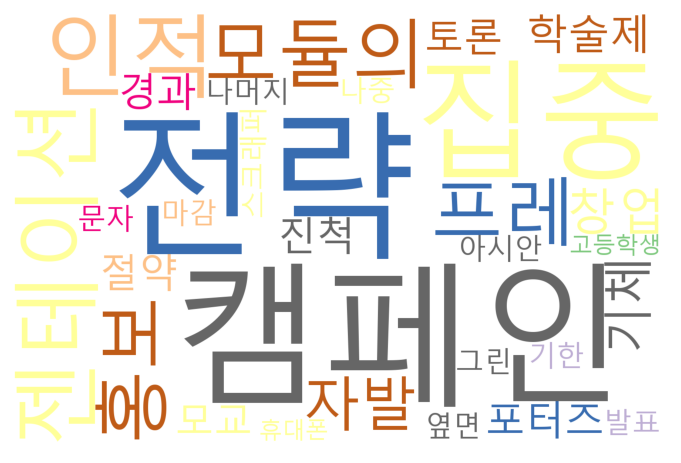

In [64]:
wordcloud = WordCloud(font_path = 'malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(marketing_dict)
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()


다음과 같이 마케팅에 대한 WordCloud를 통하여 좀 더 직관적으로 마케팅 관련 키워드를 확인할 수 있었습니다. 

결과적으로 서론에서 목표로 했던 마케팅 직무를 쓸때 추천하는 키워드는 집중, 전략, 캠페인, 프레젠테이션 등의 소스를 얻을 수 있었습니다. 

- 이러한 분석 결과는 나중에 실제로 자기소개서를 작성할 때 도움이 될 것이라고 생각합니다.

- 개인적으로 추가적인 공부를 통해서 문장단위의 소스를 얻는 방법을 공부하고 싶습니다. 